In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [3]:
# Loading camera calibration
cameraCalibration = pickle.load( open('./camera_calibration.p', 'rb' ) )
mtx, dist = map(cameraCalibration.get, ('mtx', 'dist'))

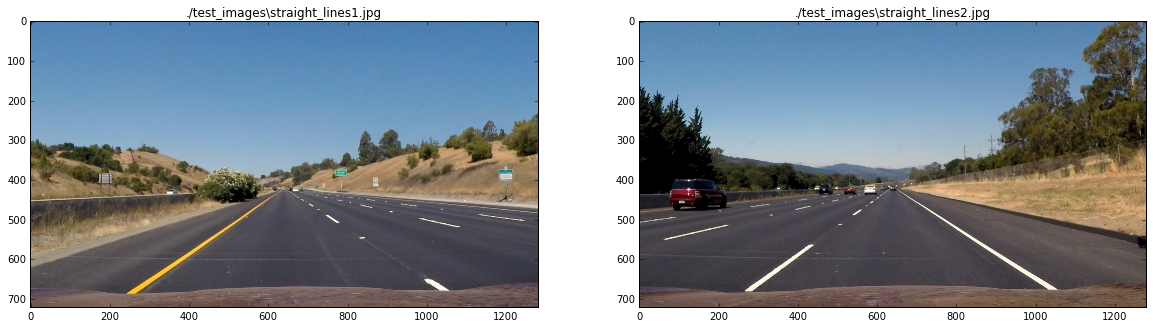

In [4]:
# Load calibration images.
testImages = list(map(lambda imageFileName: (imageFileName, cv2.imread(imageFileName)), 
                      glob.glob('./test_images/st*.jpg')))

def imageSideBySide(leftImg, leftTitle, rightImg, rightTitle, figsize=(20,10) , leftCmap=None, rightCmap=None):
    """
    Display the images `leftImg` and `rightImg` side by side with image titles.
    """
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    if leftCmap == None:
        axes[0].imshow(leftImg)
    else:
        axes[0].imshow(leftImg, cmap=leftCmap)
    axes[0].set_title(leftTitle)
    
    if rightCmap == None:
        axes[1].imshow(rightImg)
    else:
        axes[1].imshow(rightImg, cmap=rightCmap)
    axes[1].set_title(rightTitle)
    
imageSideBySide(
    cv2.cvtColor(testImages[0][1],cv2.COLOR_BGR2RGB), testImages[0][0],
    cv2.cvtColor(testImages[1][1],cv2.COLOR_BGR2RGB), testImages[1][0],
)

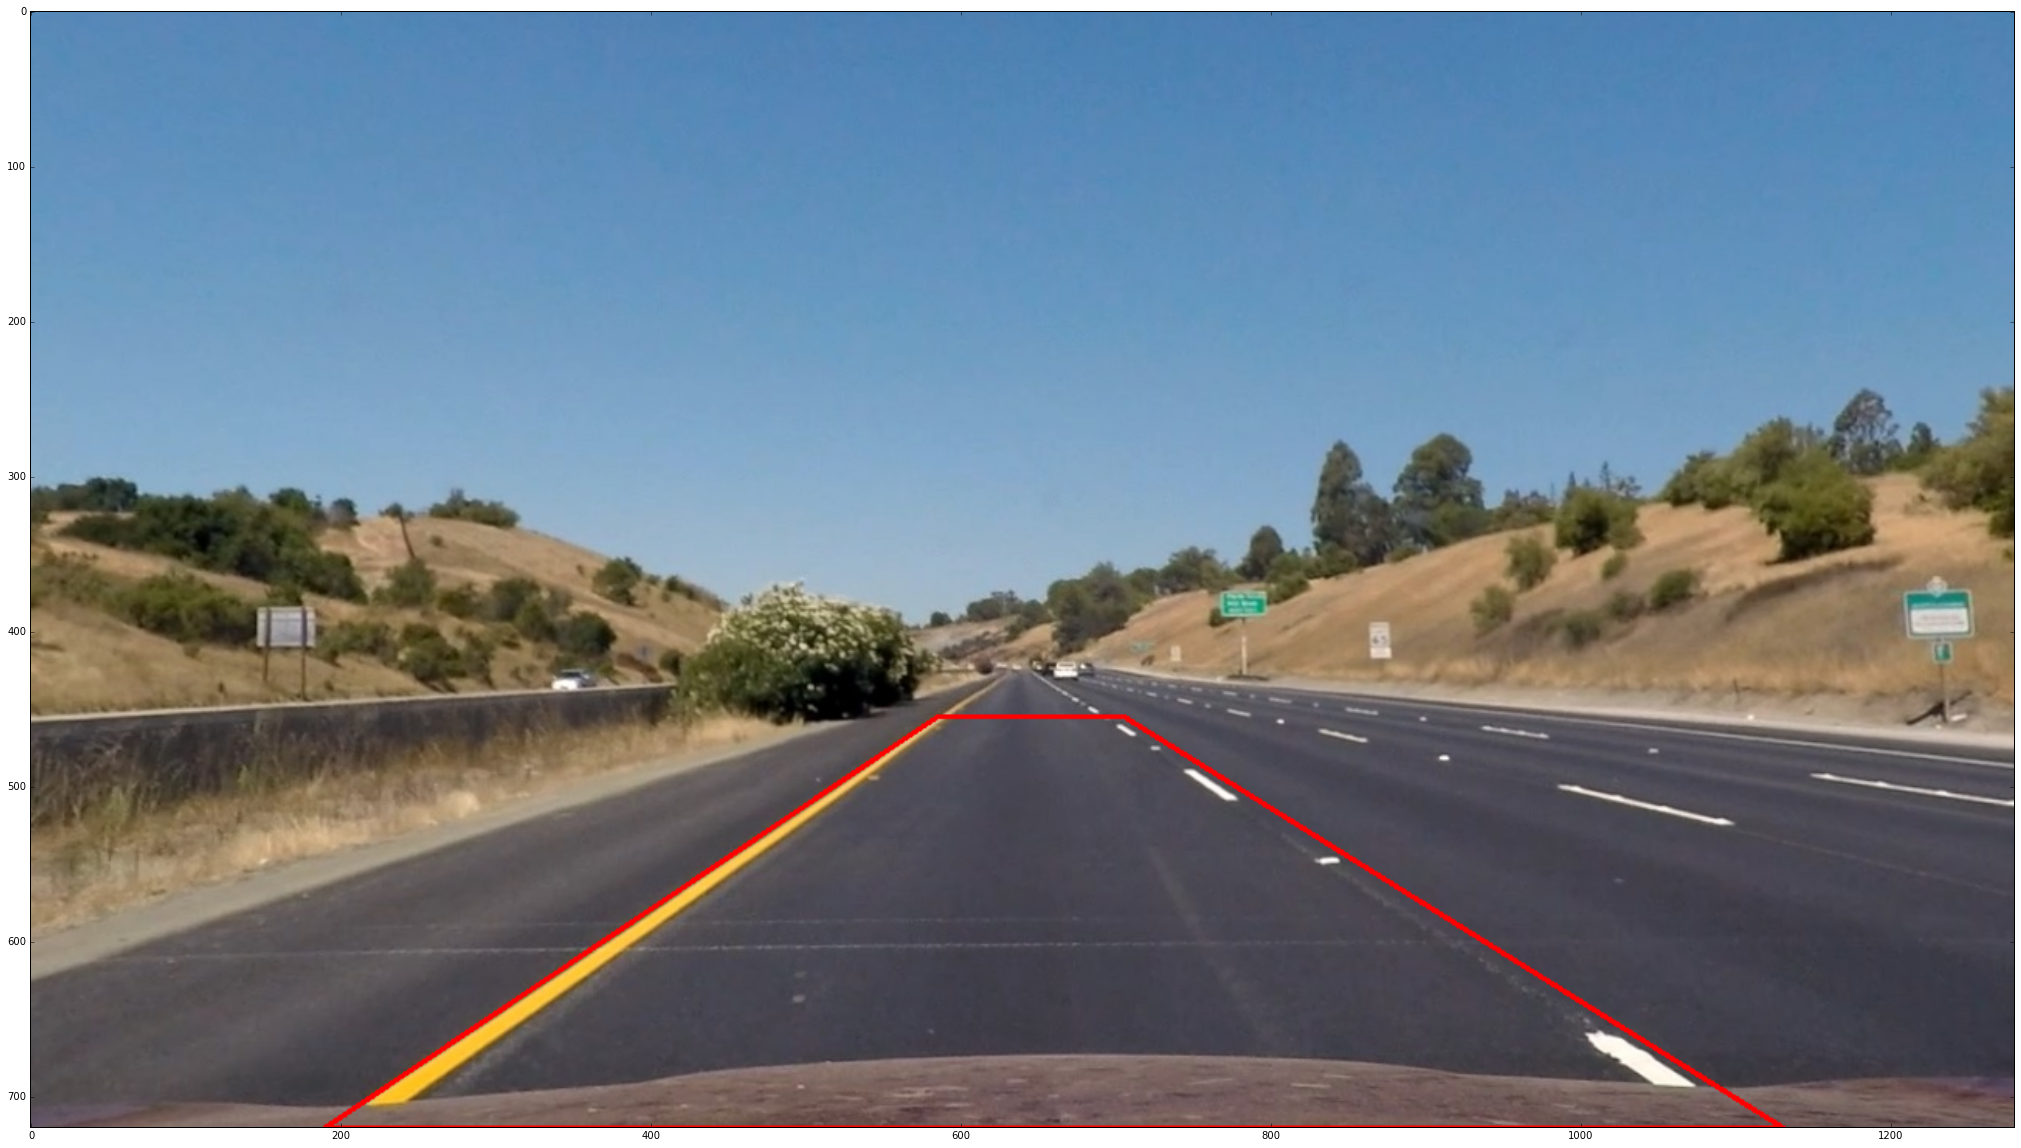

In [5]:
index = 0
original = cv2.cvtColor(testImages[index][1],cv2.COLOR_BGR2RGB)
undist = cv2.undistort(original, mtx, dist, None, mtx)

xSize, ySize, _ = undist.shape
copy = undist.copy()

bottomY = 720
topY = 455


left1 = (190, bottomY)
left1_x, left1_y = left1
left2 = (585, topY)
left2_x, left2_y = left2

right1 = (705, topY)
right1_x, right1_y = right1

right2 = (1130, bottomY)
right2_x, right2_y = right2

color = [255, 0, 0]
w = 2
cv2.line(copy, left1, left2, color, w)
cv2.line(copy, left2, right1, color, w)
cv2.line(copy, right1, right2, color, w)
cv2.line(copy, right2, left1, color, w)
fig, ax = plt.subplots(figsize=(40, 20))
ax.imshow(copy)


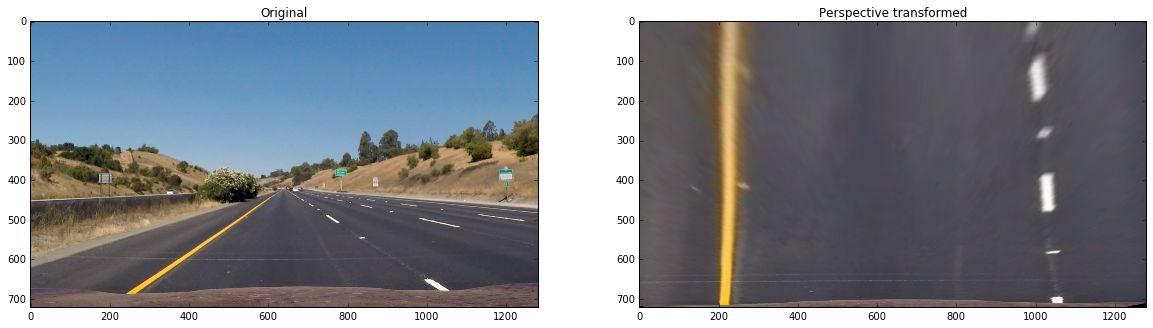

In [6]:
gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
src = np.float32([ 
    [left2_x, left2_y],
    [right1_x, right1_y],
    [right2_x, right2_y],
    [left1_x, left1_y]
])
nX = gray.shape[1]
nY = gray.shape[0]
img_size = (nX, nY)
offset = 200
dst = np.float32([
    [offset, 0],
    [img_size[0]-offset, 0],
    [img_size[0]-offset, img_size[1]], 
    [offset, img_size[1]]
])
img_size = (gray.shape[1], gray.shape[0])
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)
warped = cv2.warpPerspective(undist, M, img_size)

imageSideBySide(
    original, 'Original',
    warped, 'Perspective transformed'
)
warped = cv2.warpPerspective(undist, M, img_size)


In [7]:
pickle.dump( { 'M': M, 'Minv': Minv }, open('./perspective_transform.p', 'wb'))

In [8]:
print(M)

[[ -6.83269851e-01  -1.49897451e+00   1.06311163e+03]
 [ -1.20729385e-15  -1.98300615e+00   9.02267800e+02]
 [ -1.15194662e-18  -2.40257838e-03   1.00000000e+00]]


In [9]:
print(Minv)

[[  1.36363636e-01  -7.78812057e-01   5.57727273e+02]
 [ -5.26327952e-17  -5.04284870e-01   4.55000000e+02]
 [  0.00000000e+00  -1.21158392e-03   1.00000000e+00]]
